In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [50]:
iris_data = pd.read_csv('DataSet/Iris.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,2.7,1.4,0.3,setosa
1,6.5,2.7,6.1,1.9,virginica
2,5.9,3.6,1.1,0.3,setosa
3,5.4,2.6,1.1,1.4,versicolor
4,6.5,3.2,1.4,1.8,versicolor


In [51]:
x = iris_data.iloc[:,:-1].values
x

array([[6.3, 2.7, 1.4, 0.3],
       [6.5, 2.7, 6.1, 1.9],
       [5.9, 3.6, 1.1, 0.3],
       ...,
       [5.7, 2.7, 0.9, 1.6],
       [4.8, 3. , 3.3, 1.4],
       [5.6, 2.7, 4.3, 1.3]])

In [53]:
y = iris_data.iloc[:,-1]
y

0            setosa
1         virginica
2            setosa
3        versicolor
4        versicolor
            ...    
49731     virginica
49732    versicolor
49733        setosa
49734        setosa
49735    versicolor
Name: species, Length: 49736, dtype: object

In [56]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.01,random_state= 42)
train_x


In [58]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)
train_x

array([[ 0.11655878,  0.1434326 ,  0.43351391,  0.17437942],
       [ 0.54866731,  0.1434326 ,  0.76601512,  0.31975859],
       [-1.32380298, -2.07803856,  0.15642958, -0.11637892],
       ...,
       [ 1.55692055,  1.25416818,  0.82143199,  0.7558961 ],
       [-1.75591151, -1.52267077, -1.45065957, -0.11637892],
       [-0.31554974,  0.69880039,  0.32268018, -0.11637892]])

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)
ghost = knn.predict(test_x)
ghost

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor

[[ 52  27   2]
 [ 16 229   5]
 [  2  10 155]]


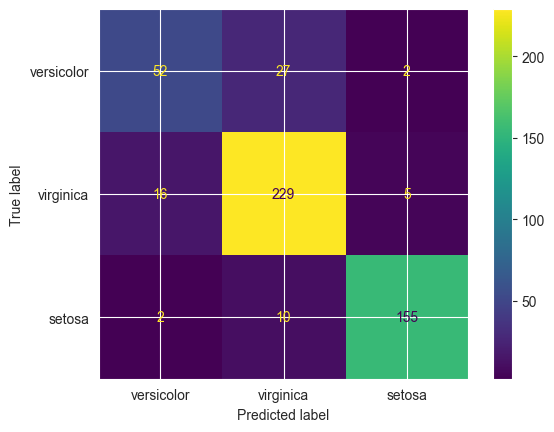

In [68]:
label = ['versicolor','virginica','setosa']

devil = confusion_matrix(test_y,ghost)

dis = ConfusionMatrixDisplay(devil,display_labels = label)

dis.plot()

print(devil)

In [64]:
score = accuracy_score(test_y,ghost)
score

0.8795180722891566

In [65]:
print(classification_report(test_y,ghost))

              precision    recall  f1-score   support

      setosa       0.73      0.65      0.69        81
  versicolor       0.87      0.92      0.89       250
   virginica       0.96      0.93      0.95       167

    accuracy                           0.88       498
   macro avg       0.85      0.83      0.84       498
weighted avg       0.88      0.88      0.88       498


In [66]:
pred = knn.predict(scaler.transform([[6.8,2.5,2.8,1.7]]))
pred

array(['versicolor'], dtype=object)